# CS4035 - Cyber Data Analytics
## Lab 3 

min-wise-hashing### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 3 contains 4 main questions + 1 bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

## Group Number :

## Student 1 
### Name : Krzysztof Baran
### ID : 4662148

## Student 2
### Name : Michał Okoń
### ID : 5056640

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

In [8]:
import time
import sympy
import nbformat
import pandas as pd
import numpy as np
from collections import Counter
from itertools import combinations
from typing import Dict, List, Set, Union, Tuple
from rich.progress import track
from rich.console import Console
from rich.table import Table
import matplotlib.pyplot as plt

In [9]:
# If this cell does not work try running ``
nb = nbformat.read("Lab3.ipynb", nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print("Word count:", word_count)

Word count: 529


## 1. Familiarization and discretization task – 1 A4 (5 Points)

### 1a. Plot visualizations - Select and visualize two features for modeling the behavior of the infected host.

Investigating the dataset.

In [10]:
df = pd.read_csv("datasets/dataset_10/capture20110818.binetflow")
df.head()

# Print unique values of labels
df.Label.unique()

array(['flow=Background-TCP-Attempt', 'flow=Background-TCP-Established',
       'flow=Background-Established-cmpgw-CVUT',
       'flow=To-Background-CVUT-Proxy', 'flow=Background',
       'flow=Background-UDP-Established', 'flow=Background-UDP-Attempt',
       'flow=From-Background-CVUT-Proxy',
       'flow=To-Background-UDP-CVUT-DNS-Server',
       'flow=To-Background-Grill', 'flow=Background-Attempt-cmpgw-CVUT',
       'flow=Background-UDP-NTP-Established-1',
       'flow=Background-google-webmail',
       'flow=Background-google-analytics11', 'flow=From-Normal-V51-Grill',
       'flow=Background-google-analytics10',
       'flow=From-Normal-V51-Stribrek',
       'flow=Background-google-analytics6', 'flow=To-Background-Stribrek',
       'flow=Background-google-analytics9',
       'flow=To-Background-CVUT-WebServer',
       'flow=Background-google-analytics15',
       'flow=Background-google-analytics2', 'flow=From-Normal-V51-Jist',
       'flow=Background-google-analytics8', 'flow=To

In [11]:
# Print the number of null values
print("Number of Nan values: ")
print(df.isnull().sum())
print("####################################")

# Print types of features
print("Types of features: ")
for col in df.columns:
    print(col, ": ", type(df[col][0]))
print("####################################")

# Print the number of unique values for each feature
print("Number of unique values for each feature: ")
for col in df.columns:
    print(col, ": ", len(df[col].unique()))

Number of Nan values: 
StartTime         0
Dur               0
Proto             0
SrcAddr           0
Sport          6987
Dir               0
DstAddr           0
Dport        104215
State          1228
sTos          12852
dTos         186791
TotPkts           0
TotBytes          0
SrcBytes          0
Label             0
dtype: int64
####################################
Types of features: 
StartTime :  <class 'str'>
Dur :  <class 'numpy.float64'>
Proto :  <class 'str'>
SrcAddr :  <class 'str'>
Sport :  <class 'str'>
Dir :  <class 'str'>
DstAddr :  <class 'str'>
Dport :  <class 'str'>
State :  <class 'str'>
sTos :  <class 'numpy.float64'>
dTos :  <class 'numpy.float64'>
TotPkts :  <class 'numpy.int64'>
TotBytes :  <class 'numpy.int64'>
SrcBytes :  <class 'numpy.int64'>
Label :  <class 'str'>
####################################
Number of unique values for each feature: 
StartTime :  1309789
Dur :  515748
Proto :  14
SrcAddr :  151256
Sport :  114793
Dir :  6
DstAddr :  72957
Dport :  47

Preprocessing data. Filling in the missing values and converting the types.

In [12]:
# Replace the Nan values of the sport and dport features with 0
df['Sport'] = df['Sport'].fillna("-1")
df['Dport'] = df['Dport'].fillna("-1")

# Turn the hex values of the sport and dport features into int if it is a hex value
df['Sport'] = df['Sport'].apply(lambda x: int(x, 16) if type(x) == str and x.startswith('0x') else x)
df['Dport'] = df['Dport'].apply(lambda x: int(x, 16) if type(x) == str and x.startswith('0x') else x)


# Change the type of the dport and sport features to int
df['Sport'] = df['Sport'].astype(int)
df['Dport'] = df['Dport'].astype(int)

# Replace one NaN value of the State
df['State'] = df['State'].fillna("None")

In [13]:
# Print the range of values for each feature
print("Range of values for each feature: ")
for col in df.columns:
    if type(df[col][0]) == str:
        continue
    print(col, ": ", df[col].min(), " - ", df[col].max())

Range of values for each feature: 
Dur :  0.0  -  3600.019287
Sport :  -1  -  65535
Dport :  -1  -  539032744
sTos :  0.0  -  192.0
dTos :  0.0  -  3.0
TotPkts :  1  -  1853001
TotBytes :  60  -  1933022240
SrcBytes :  0  -  1233899763


In [14]:
# Print unique strings of each feature
print("Unique values for each string feature: ")
for col in df.columns:
    if type(df[col][0]) == str:
        print(col, ": ", df[col].unique())

Unique values for each string feature: 
StartTime :  ['2011/08/18 10:21:46.633335' '2011/08/18 10:19:49.027650'
 '2011/08/18 10:22:07.160628' ... '2011/08/18 15:04:59.686325'
 '2011/08/18 15:04:59.690632' '2011/08/18 15:04:59.703972']
Proto :  ['tcp' 'udp' 'icmp' 'pim' 'arp' 'ipx/spx' 'rtp' 'rtcp' 'igmp' 'ipv6-icmp'
 'ipv6' 'esp' 'llc' 'udt']
SrcAddr :  ['93.45.239.29' '62.240.166.118' '147.32.86.148' ... '197.252.19.173'
 '83.183.55.171' '177.16.175.252']
Dir :  ['   ->' '  <?>' '   ?>' '  <->' '  who' '  <-']
DstAddr :  ['147.32.84.118' '147.32.84.229' '66.235.132.232' ... '213.102.121.139'
 '60.234.51.66' '173.21.49.153']
State :  ['S_RA' 'SRPA_PA' 'SR_SA' 'SRA_SA' 'SR_A' 'SRPA_FSPA' 'SRPA_SA' 'RA_'
 'S_SRA' 'FSPA_FSRPA' 'FSA_FSA' 'FRPA_FPA' 'CON' 'PA_PA' 'A_FPA' 'FPA_FPA'
 'INT' 'URP' 'RPA_FPA' 'FPA_FA' 'PA_FRA' 'FPA_FSPA' 'PA_A' 'A_PA' 'RA_FPA'
 'PA_RPA' 'FRPAC_FPA' 'A_' 'S_' 'FSPA_FSPA' 'FA_A' 'RPA_PA' 'SRPA_SPA'
 'FPA_FRA' 'R_' 'RSP' 'FA_FA' 'RED' 'SA_' 'FA_RA' 'FA_R' 'FPA_PA'
 

In [15]:
# Group the df into malicious and benign flows
# The label of malicious flows contain the string 'Botnet'
malicious_flows = df[df.Label.str.contains('Botnet')]
benign_flows = df[~df.Label.str.contains('Botnet')]

# Print the number of malicious and benign flows
print("Number of malicious flows: ", len(malicious_flows))
print("Number of benign flows: ", len(benign_flows))

Number of malicious flows:  106352
Number of benign flows:  1203439


In [16]:
display(malicious_flows.head())
display(benign_flows.head())

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
90622,2011/08/18 10:37:58.448307,0.000342,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,203,64,flow=From-Botnet-V51-1-UDP-DNS
90808,2011/08/18 10:38:00.695278,0.010278,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,590,87,flow=From-Botnet-V51-1-UDP-DNS
90809,2011/08/18 10:38:00.706560,0.043726,tcp,147.32.84.165,1027,->,74.125.232.206,80,SRPA_SPA,0.0,0.0,7,882,629,flow=From-Botnet-V51-1-TCP-HTTP-Google-Net-Est...
90965,2011/08/18 10:38:03.255934,0.010256,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,479,76,flow=From-Botnet-V51-1-UDP-DNS
90968,2011/08/18 10:38:03.267222,581.516663,udp,147.32.84.165,123,->,65.55.56.40,123,INT,0.0,NaN,4,360,360,flow=From-Botnet-V51-1-UDP-Attempt


,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/18 10:21:46.633335,1.060248,tcp,93.45.239.29,1611,->,147.32.84.118,6881,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt
1,2011/08/18 10:19:49.027650,279.349152,tcp,62.240.166.118,1031,<?>,147.32.84.229,13363,SRPA_PA,0.0,0.0,15,1318,955,flow=Background-TCP-Attempt
2,2011/08/18 10:22:07.160628,166.390015,tcp,147.32.86.148,58067,->,66.235.132.232,80,SR_SA,0.0,0.0,3,212,134,flow=Background-TCP-Established
3,2011/08/18 10:26:02.052163,1.187083,tcp,147.32.3.51,3130,->,147.32.84.46,10010,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt
4,2011/08/18 10:26:52.226748,0.980571,tcp,88.212.37.169,3134,->,147.32.84.118,6881,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt


In [17]:
# Find Nan values
print("Number of Nan values in malicious flows: ")
print(malicious_flows.isnull().sum())
print("Number of Nan values in benign flows: ")
print(benign_flows.isnull().sum())

Number of Nan values in malicious flows: 
StartTime         0
Dur               0
Proto             0
SrcAddr           0
Sport             0
Dir               0
DstAddr           0
Dport             0
State             0
sTos              0
dTos         106116
TotPkts           0
TotBytes          0
SrcBytes          0
Label             0
dtype: int64
Number of Nan values in benign flows: 
StartTime        0
Dur              0
Proto            0
SrcAddr          0
Sport            0
Dir              0
DstAddr          0
Dport            0
State            0
sTos         12852
dTos         80675
TotPkts          0
TotBytes         0
SrcBytes         0
Label            0
dtype: int64


In [18]:
# Print out the float values of state
print("Float values of state in malicious flows: ")
print(malicious_flows[malicious_flows['State'].apply(lambda x: type(x) == float)])

Float values of state in malicious flows: 
Empty DataFrame
Columns: [StartTime, Dur, Proto, SrcAddr, Sport, Dir, DstAddr, Dport, State, sTos, dTos, TotPkts, TotBytes, SrcBytes, Label]
Index: []


In [19]:
# Convert floats to None in state
malicious_flows['State'] = malicious_flows['State'].apply(lambda x: "None" if type(x) == float else x)

/tmp/ipykernel_30/3458801520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  malicious_flows['State'] = malicious_flows['State'].apply(lambda x: "None" if type(x) == float else x)


Visualizing two features that distribution varies between malicious and benign hosts - Proto and Dir

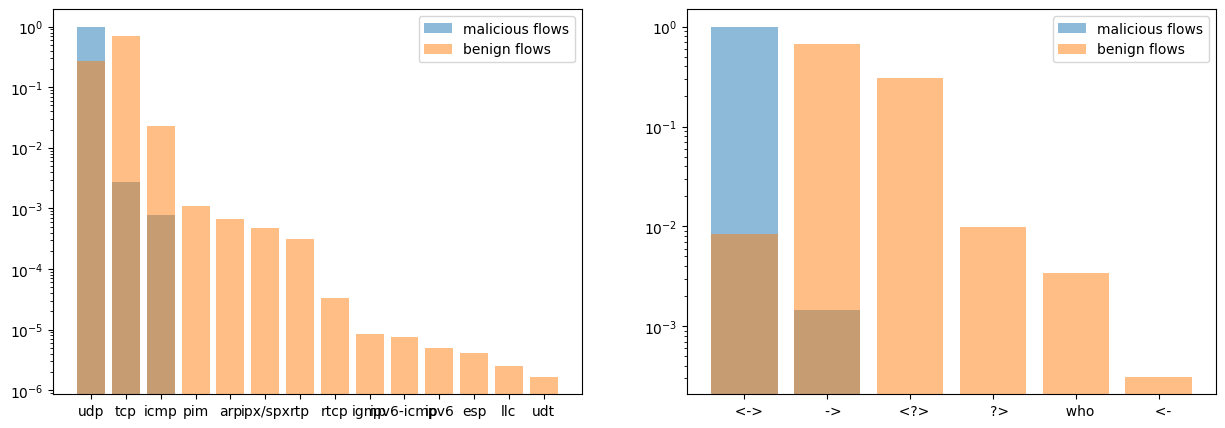

In [20]:
# Visualize the distribution of the features

# Select two features
feature1 = 'Proto'
feature2 = 'Dir'

# Plot the distribution of the features normalized
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# ax[0].hist(malicious_flows[feature1], bins=50, alpha=0.5, label='malicious flows', density=True)
# ax[0].hist(benign_flows[feature1], bins=50, alpha=0.5, label='benign flows', density=True)
ax[0].bar(malicious_flows[feature1].unique(), malicious_flows[feature1].value_counts(normalize=True), alpha=0.5, label='malicious flows')
ax[0].bar(benign_flows[feature1].unique(), benign_flows[feature1].value_counts(normalize=True), alpha=0.5, label='benign flows')
ax[1].bar(malicious_flows[feature2].unique(), malicious_flows[feature2].value_counts(normalize=True), alpha=0.5, label='malicious flows')
ax[1].bar(benign_flows[feature2].unique(), benign_flows[feature2].value_counts(normalize=True), alpha=0.5, label='benign flows')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
ax[0].legend()
ax[1].legend()

### 1b. Discretize selected features

Using attribute mappings to discretize the selected features.

In [21]:
def netflow_discretize(data_df: pd.DataFrame, feature_maps: Dict[str, Dict]):
    """Netflow encoding using attribute mappings.

    Attributes:
        data_df (pd.DataFrame): data with features used in discretization
        feature_maps (Dict[str, Dict]): map of attributes to their encoders
    """
    attr_count = np.prod([len(feature_maps[attr].keys()) for attr in feature_maps])

    def map_values(row):
        return [feature_maps[col].get(val, val) for col, val in row.items()]

    # Vectorized feature transformation
    transformed_data = data_df.apply(map_values, axis=1, result_type='broadcast')

    space_sizes = attr_count / np.cumprod([len(feature_maps[col].keys()) for col in data_df.columns])

    # The calculation is performed along the rows (axis=1)
    codes = (transformed_data * space_sizes).sum(axis=1)

    data_df['code'] = codes
    return data_df

Botnet host with the most flows is investigated.

In [22]:
most_evil_host = malicious_flows["SrcAddr"].value_counts().index[0]
most_evil_host

'147.32.84.205'

Features are mapped to integers based on the number of rows they occur in the data.

In [23]:
# Sort array of unique values of feature1 based on the number of rows it occurs in df
feature1_sorted = list(df[feature1].value_counts().index)
feature2_sorted = list(df[feature2].value_counts().index)

print("Feature1 sorted: ", feature1_sorted)
print("Feature2 sorted: ", feature2_sorted)

feature1_mapping = dict(zip(feature1_sorted, range(len(feature1_sorted))))
feature2_mapping = dict(zip(feature2_sorted, range(len(feature2_sorted))))

print("Feature1 mapping: ", feature1_mapping)
print("Feature2 mapping: ", feature2_mapping)

Feature1 sorted:  ['udp', 'tcp', 'icmp', 'igmp', 'rtp', 'rtcp', 'arp', 'ipv6-icmp', 'esp', 'ipx/spx', 'ipv6', 'pim', 'udt', 'llc']
Feature2 sorted:  ['  <->', '   ->', '  <?>', '  <-', '   ?>', '  who']
Feature1 mapping:  {'udp': 0, 'tcp': 1, 'icmp': 2, 'igmp': 3, 'rtp': 4, 'rtcp': 5, 'arp': 6, 'ipv6-icmp': 7, 'esp': 8, 'ipx/spx': 9, 'ipv6': 10, 'pim': 11, 'udt': 12, 'llc': 13}
Feature2 mapping:  {'  <->': 0, '   ->': 1, '  <?>': 2, '  <-': 3, '   ?>': 4, '  who': 5}


In [24]:
feat_map = {feature1:feature1_mapping, feature2:feature2_mapping}

host_df = df[df["SrcAddr"] == most_evil_host][[feature1, feature2]]

In [25]:
# Discretize the selected features for the chosen host
discretized_malicious_df = netflow_discretize(host_df, feat_map)
discretized_malicious_df.head(30)

,Proto,Dir,code
172713,udp,<->,0.0
172838,udp,<->,0.0
172839,tcp,->,7.0
172971,udp,<->,0.0
172972,udp,->,1.0
209871,udp,<->,0.0
209873,tcp,->,7.0
276431,udp,<->,0.0
276714,udp,<->,0.0
276715,tcp,->,7.0


In [26]:
# Discretize the selected features for the benign hosts
benign_hosts_df = benign_flows[[feature1, feature2]]
discretized_benign_df = netflow_discretize(benign_hosts_df, feat_map)
discretized_benign_df

/tmp/ipykernel_30/3976709242.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['code'] = codes


,Proto,Dir,code
0,tcp,->,7.0
1,tcp,<?>,8.0
2,tcp,->,7.0
3,tcp,->,7.0
4,tcp,->,7.0
...,...,...,...
1309786,tcp,->,7.0
1309787,udp,<->,0.0
1309788,udp,<->,0.0
1309789,udp,->,1.0


In [27]:
# Discretize the selected features for all hosts
all_hosts_df = df[[feature1, feature2]]
discretized_all_df = netflow_discretize(all_hosts_df, feat_map)
discretized_all_df

/tmp/ipykernel_30/3976709242.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['code'] = codes


,Proto,Dir,code
0,tcp,->,7.0
1,tcp,<?>,8.0
2,tcp,->,7.0
3,tcp,->,7.0
4,tcp,->,7.0
...,...,...,...
1309786,tcp,->,7.0
1309787,udp,<->,0.0
1309788,udp,<->,0.0
1309789,udp,->,1.0


Text(0.5, 1.0, 'Distribution of the code for the chosen host and benign hosts')

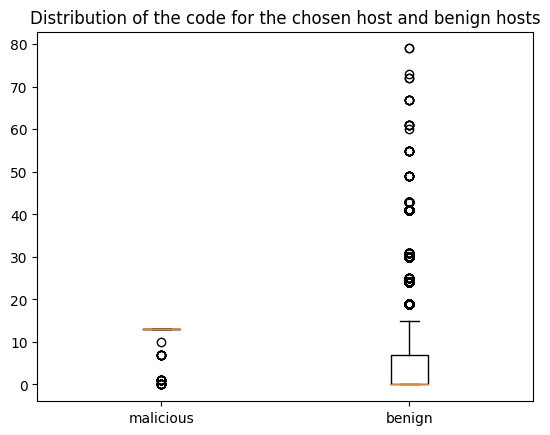

In [28]:
# Plot the distribution of the flow codes for the chosen host and benign hosts
fig, ax = plt.subplots()
ax.boxplot([discretized_malicious_df['code'], discretized_benign_df['code']])
ax.set_xticklabels(['malicious', 'benign'])
plt.title("Distribution of the code for the chosen host and benign hosts")

Text(0.5, 1.0, 'Distribution of the code for the chosen host and all hosts')

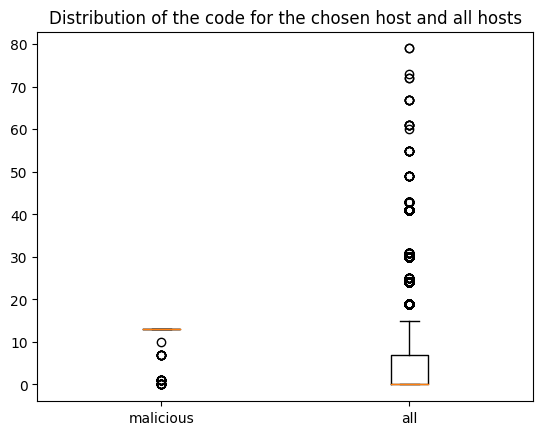

In [29]:
# Plot the distribution of the flow codes for the chosen host and benign hosts
fig, ax = plt.subplots()
ax.boxplot([discretized_malicious_df['code'], discretized_all_df['code']])
ax.set_xticklabels(['malicious', 'all'])
plt.title("Distribution of the code for the chosen host and all hosts")

### 1c. Answers and explanation

From the initial analysis of the processed data, we deduced that Proto and Dir features show the largest difference in distribution between malicious and non-malicious hosts. Having discretized the flows of a selected malicious host and all other host, it is clearly visible that the distribution of the flow codes is different. While the distribution of flows of non-malicious hosts is heavily centered around 0, while the codes of the malicious host are larger with most of them being equal to 13. Therefore, it seems that the attacks of the selected host usually have one specific direction (->) and follow one protocol (ICMP). This seems to make sense as ICMP prototcol is used for testing networks and diagnosing them through ping and traceroute which can be used for Ping or DDoS attacks.

## 2. Sketching task – 1/2 A4 (Individual, 10 Points)

### 2a. COUNT-MIN sketch


### 2b. Analysis and answers to the questions

## 3. Min-wise locality sensitive hashing task – 1/2 A4 (Individual, 10 Points)

### 3a. Implementation

#### Discretising Connection i.e. SrcAddr and DstAddr 

In [30]:
# Build discretizations
def discretize_in_one(data_df: pd.DataFrame, feature_maps: Dict[str, Dict], out_column: str = "code") -> pd.DataFrame:
    """Netflow encoding using attribute mappings.

    Args:
        data_df (pd.DataFrame): Data with features used in discretization.
        feature_maps (Dict[str, Dict]): Map of attributes to their value maps.
        out_column (str, optional): Name of the output column. Defaults to 'code'.

    Returns:
        pd.DataFrame: Dataframe with the discretized data, including the output column.
    """
    attr_count = np.prod([len(feature_maps[attr].keys()) for attr in feature_maps])

    def map_values(row):
        return [feature_maps[col].get(val, val) for col, val in row.items()]

    # Vectorized feature transformation
    transformed_data = data_df.apply(map_values, axis=1, result_type='broadcast')

    space_sizes = attr_count / np.cumprod([len(feature_maps[col].keys()) for col in data_df.columns])

    # The calculation is performed along the rows (axis=1)
    codes = (transformed_data * space_sizes).sum(axis=1)

    data_df[out_column] = codes
    return data_df


def discretization_df(data_df: pd.DataFrame, columns:List[str], out_column:str) -> pd.DataFrame:
    """Custom discretisation of data.

    Args:
            data_df (pd.DataFrame): data frame to discretize and output
            columns (List[str]): columns to discretize
            out_column (str): name of the output column.

    Returns:
        pd.DataFrame: DataFrame with inputed dataframe and discrtisation of columns (columns to discretize are removed)
    """
    feat_maps_dict = dict()
    for feature in columns:
        feature_sorted = list(data_df[feature].value_counts().index)
        feature_mapping = dict(zip(feature_sorted, range(len(feature_sorted))))
        feat_maps_dict[feature] = feature_mapping
    data_disc_df = discretize_in_one(data_df[columns].copy(), feat_maps_dict, out_column=out_column)
    data_disc_df.drop(columns, axis=1, inplace=True)
    new_data = data_df.copy()
    new_data.drop(columns, axis=1, inplace=True)
    return pd.concat([new_data, data_disc_df], axis=1)

In [31]:
connection_disc_df = discretization_df(df, ["SrcAddr", "DstAddr"], "Connection")
connection_disc_df

,StartTime,Dur,Proto,Sport,Dir,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Connection
0,2011/08/18 10:21:46.633335,1.060248,tcp,1611,->,6881,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt,1.264928e+09
1,2011/08/18 10:19:49.027650,279.349152,tcp,1031,<?>,13363,SRPA_PA,0.0,0.0,15,1318,955,flow=Background-TCP-Attempt,1.334384e+08
2,2011/08/18 10:22:07.160628,166.390015,tcp,58067,->,80,SR_SA,0.0,0.0,3,212,134,flow=Background-TCP-Established,5.546957e+06
3,2011/08/18 10:26:02.052163,1.187083,tcp,3130,->,10010,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt,9.630532e+06
4,2011/08/18 10:26:52.226748,0.980571,tcp,3134,->,6881,S_RA,0.0,0.0,4,244,124,flow=Background-TCP-Attempt,1.800579e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1309786,2011/08/18 15:04:59.579762,0.000158,tcp,25463,->,80,S_SA,0.0,0.0,2,152,78,flow=Background-TCP-Established,1.648835e+07
1309787,2011/08/18 15:04:59.626719,0.000688,udp,64126,<->,13363,CON,0.0,0.0,2,306,244,flow=Background-UDP-Established,3.588755e+08
1309788,2011/08/18 15:04:59.686325,0.000689,udp,44432,<->,13363,CON,0.0,0.0,2,144,83,flow=Background-UDP-Established,1.251577e+09
1309789,2011/08/18 15:04:59.690632,0.000000,udp,16978,->,13363,INT,0.0,NaN,1,172,172,flow=Background-UDP-Attempt,3.308527e+09


#### Building 3-grams

In [32]:
def build_3_grams(data: np.ndarray, window_step: int = 1, with_count: bool = True) -> Union[Counter, Set[str]]:
    """Creates 3-grams from a list of items.

    Args:
        data (np.ndarray): numpy array of data to create 3-grams from
        window_step (int, optional): number of steps to take to next window. Defaults to 1.
        with_count (bool, optional): determines if the counter will be used. Defaults to True.
    Returns:
        Union[Counter, Set[str]]: Output of the Counter attribute or set of 3grams
    """
    ngrams = [] if with_count else set()
    for i in range(0, data.shape[0] - 2, window_step):
        window = data[i:i+3]
        window_str = np.array2string(window)
        if with_count:
            ngrams.append(window_str)
        else:
            ngrams.add(window_str)

    if with_count:
        ngram_counter = Counter(ngrams)
        return ngram_counter
    return set(ngrams)


def build_3gram_df(data:np.ndarray, data_window_size, data_window_step, three_gram_step:int=1) -> pd.DataFrame:
    """Builds a pandas DataFrame containing the counts of 3-grams within sliding windows of data.

    Args:
        data (np.ndarray): Numpy array of data to extract 3-grams from.
        data_window_size (int): Size of the sliding window used on the data.
        data_window_step (int): Number of steps to take to the next sliding window.
        three_gram_step (int, optional): Number of steps to take to the next 3-gram. Defaults to 1.

    Returns:
        pd.DataFrame: DataFrame containing the counts of 3-grams within sliding windows of data.
    """
    ngrams_names = build_3_grams(data, window_step=three_gram_step, with_count=False)
    ngram_df_data = {key: [] for key in ngrams_names}
    data_length = data.shape[0]

    for i in range(0, data_length - data_window_size + 1, data_window_step):
        window = data[i:i+data_window_size]
        ngram_counter = build_3_grams(window, window_step=three_gram_step, with_count=True)
        for n_gram in ngrams_names:
            ngram_df_data[n_gram].append(ngram_counter.get(n_gram, 0))

    return pd.DataFrame(ngram_df_data)

In [93]:
connections_np_arr = connection_disc_df["Connection"].to_numpy()
three_gram_connection_train_data = build_3gram_df(connections_np_arr, 50000, 50000)
three_gram_connection_train_data

,[175878. 164611. 156169.],[ 0. 0. 6274642.],[ 0. 2846360. 2847231.],[2.92179000e+05 1.46351743e+08 3.79384800e+06],[7.29570000e+04 7.29570000e+04 1.50780232e+09],[16561240. 300705. 0.],[5.55341389e+09 3.50631343e+08 6.60260860e+07],[1.45185900e+07 9.92219000e+06 4.96034644e+08],[5.53749690e+07 4.87177663e+09 2.44726961e+09],[2.31828163e+09 2.31820868e+09 1.53214000e+06],...,[21814144. 9849782. 9849195.],[ 72957. 802529. 1021400.],[3.94060400e+06 8.92001466e+09 3.21010800e+06],[ 154635. 1605334. 164504.],[2.18881900e+06 5.83661000e+05 2.69211371e+09],[3.57489300e+06 5.77359811e+09 1.55913000e+05],[1.24027100e+06 5.08342489e+09 2.18879700e+06],[7.29570000e+04 7.29570000e+04 8.66364375e+09],[1752523. 1752523. 1752523.],[3.02545384e+09 3.02530792e+09 8.70347830e+09]
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Performing the LSH

In [94]:
def get_primes_list(n: int, max_value: int, min_value: int) -> np.ndarray:
    """Generate a list of prime numbers of .

    Args:
        n (int): Number of hash functions to generate.
        max_value (int): Maximum value for the hash functions.
        min_value (int, optional): Minumum value for the hash functions. 

    Returns:
        np.ndarray: List of prime numbers.
    """
    primes = np.array([sympy.randprime(min_value, max_value + 1) for _ in range(n)])
    return np.fromiter(primes, dtype=int, count=n)


def generate_hash_functions(n: int, max_value: int, min_value: int=2) -> np.ndarray:
    """Generate n hash functions that map integers from 0 to max_value using prime numbers.

    Args:
        n (int): Number of hash functions to generate.
        max_value (int): Maximum value for the hash functions.
        min_value (int, optional): Minumum value for the hash functions. Defaults to 2.

    Returns:
        np.ndarray: List of hash functions represented as pairs of prime numbers.
    """
    a = get_primes_list(n, max_value, min_value)
    b = get_primes_list(n, max_value, min_value)
    np.random.shuffle(a)
    np.random.shuffle(b)
    hash_functions = np.column_stack((a, b))
    return hash_functions

In [95]:
generate_hash_functions(5, 10000, min_value=2)

array([[4297, 7649],
       [3943, 3671],
       [2017, 5099],
       [5179,  569],
       [8419, 7993]])

In [96]:
def min_hash(ngram_set: np.ndarray, hash_functions: np.ndarray) -> np.ndarray:
    """Compute the min-hash signature for a given n-gram set.

    Args:
        ngram_set (np.ndarray): an ngram vector
        hash_functions (np.ndarray): array of components for a hash function

    Returns:
        np.ndarray: List of min-hash values.
    """
    signature = np.full(hash_functions.shape[0], np.inf)
    for ngram in ngram_set:
        hash_values = (hash_functions[:, 0] * hash(ngram) + hash_functions[:, 1]) % len(ngram_set)
        signature = np.minimum(signature, hash_values)
    return signature

In [97]:
min_hash(np.array([0,1,4,1,6,4,2,53,5,43]), np.array([[5,3],[2,7]]))

array([3., 1.])

In [98]:
def jaccard(a: Union[Set, List, np.ndarray], b: Union[Set, List, np.ndarray]) -> float:
    """Calaulates Jaccard distance between two collections.

    Args:
        a (Union[Set, List, np.ndarray]): a set or list
        b (Union[Set, List, np.ndarray]): a set or list

    Returns:
        float: List of min-hash values.
    """
    if not isinstance(a, set):
        a_set = set(list(a))
    else:
        a_set = a
    if not isinstance(b, set):
        b_set = set(list(a))
    else:
        b_set = b
    return 1.0 - len(a_set.intersection(b_set)) / len(a_set.union(b_set))

In [103]:
def minwise_lsh(ngram_profiles: np.ndarray, hashes_num:int=5, bins_num:int=10) -> Dict[Tuple[int, int], float]:
    """Perform min-wise LSH on a list of N-gram profiles.

    Args:
        ngram_profiles (np.ndarray): list of n_gram profiles
        hashes_num (int): number of hashes to use. Defaults to 10.
        bins_num (int): number of bins to use. Defaults to 5.
    Returns:
        Dict[Tuple[int, int], float]: Distionary of dinstances between points.
    """
    num_profiles = len(ngram_profiles)
    max_value = bins_num  # Set the maximum hash value to be the number of bins
    hash_functions = generate_hash_functions(hashes_num, max_value)

    signatures = np.zeros((num_profiles, hashes_num))
    for i, profile in enumerate(ngram_profiles):
        signature = min_hash(profile, hash_functions)
        signatures[i] = signature

    buckets = [[] for _ in range(hashes_num)]
    for profile_idx, signature in enumerate(signatures):
        for hash_idx, hash_value in enumerate(signature):
            buckets[hash_idx].append((profile_idx, hash_value))

    jaccard_distances = {}
    for bucket in track(buckets, description="Calculating buckets"):
        pairs = combinations(bucket, 2)
        for pair in pairs:
            (profile_idx1, hash_value1), (profile_idx2, hash_value2) = pair
            if hash_value1 == hash_value2:
                key = tuple(sorted((profile_idx1, profile_idx2)))
                jaccard_dist = jaccard(ngram_profiles[profile_idx1], ngram_profiles[profile_idx2])
                jaccard_distances[key] = jaccard_dist

    return jaccard_distances

In [100]:
three_gram_np = three_gram_connection_train_data.to_numpy()
three_gram_np.shape

(26, 834156)

In [101]:
# Compute true nearest neighbors
true_nearest_neighbors = {}
for i in track(range(len(three_gram_np)), description="Computing ground truth..."):
    distances = [(j, jaccard(three_gram_np[i], p)) for j, p in enumerate(three_gram_np) if j != i]
    true_nearest_neighbors[i] = min(distances, key=lambda x: x[1])[0]
true_nearest_neighbors

Output()

{0: 1,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0}

In [104]:
# bins experiments
bins_num_list = [2, 5, 10, 50, 100]
hashes_num = 5
res_tuples = []

for bins_num in bins_num_list:
    start_time = time.time()
    distances = minwise_lsh(three_gram_np, hashes_num=hashes_num, bins_num=bins_num)
    end_time = time.time()

    correct_count = sum(1 for i, jaccard_dist in distances.items() if true_nearest_neighbors[i[1]] == min(distances, key=lambda x: distances[x])[0])
    accuracy = correct_count / len(distances)
    runtime = end_time - start_time
    space_requirements = len(three_gram_np) * hashes_num * 2
    res = (f"{bins_num}", f"{accuracy:.3f}", f"{runtime:.3f}", f"{space_requirements}")
    res_tuples.append(res)

Output()

Output()

Output()

Output()

Output()

In [105]:
table = Table(title="LSH bin experiments results")

table.add_column("Bins No.", style="cyan")
table.add_column("Accuracy", style="magenta")
table.add_column("Runtime", style="green")
table.add_column("Space Complexity (elements No.)", justify="center", style="#ff33ff")

for res_tuple in res_tuples:
    table.add_row(*res_tuple)

console = Console()
console.print(table)

                    LSH bin experiments results                    
┏━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Bins No. ┃ Accuracy ┃ Runtime ┃ Space Complexity (elements No.) ┃
┡━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ 2        │ 1.000    │ 367.366 │            21688056             │
│ 5        │ 1.000    │ 381.247 │            21688056             │
│ 10       │ 1.000    │ 394.381 │            21688056             │
│ 50       │ 1.000    │ 412.531 │            21688056             │
│ 100      │ 1.000    │ 432.485 │            21688056             │
└──────────┴──────────┴─────────┴─────────────────────────────────┘

### 3b. Analysis and answers to the questions

From the results we can see that the larger number of bins, the higher the accuracy. This is beacuse of the fact that when having more bins, it means that there are essentially more descriptions of the points which means that the points close to each other will have a smaller distance.

It is good for this dataset as it is pretty large and has high dimetionaloty as computing exact nearest neighbors can be computationally expensive or even infeasible. Min-wise LSH offers an approximate solution that can significantly reduce the computational cost while still providing reasonable accuracy.

## 4.Botnet profiling and fingerprinting task – 1 A4 (5 Points)

### 4a. Learn a sequential model, profiling and fingerprinting

### 4b. Analysis and answers to the questions.

## 5. Bonus Task 1/2 A4 (5 Points)

### 5a. Provide implementation and analysis.